<a href="https://colab.research.google.com/github/elderorange247/coding_school/blob/main/DSRPproject%5BTamera_Thompson%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Day 1 of DSRP Office Project**

Import the Necessary Libraries:


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection

Load in the Data:

In [7]:
url = "https://raw.githubusercontent.com/dsollberger/quartoblog/master/posts/office_sentiment/office_sentiment.csv"
office_df = pd.read_csv(url)
office_df.head()

,index,season,episode,episode_name,director,writer,character,text,text_w_direction,imdb_rating,total_votes,air_date,sentimentAnalysis_score,sentimentr_score,syuzhet_score
0,1,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,All right Jim. Your quarterlies look very good...,All right Jim. Your quarterlies look very good...,7.6,3706,2005-03-24,0.285714,0.134552,2.15
1,2,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Jim,"Oh, I told you. I couldn't close it. So...","Oh, I told you. I couldn't close it. So...",7.6,3706,2005-03-24,0.000000,0.461880,0.00
2,3,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,So you've come to the master for guidance? Is ...,So you've come to the master for guidance? Is ...,7.6,3706,2005-03-24,0.428571,0.603738,0.50
3,4,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Jim,"Actually, you called me in here, but yeah.","Actually, you called me in here, but yeah.",7.6,3706,2005-03-24,0.000000,0.244949,0.00
4,5,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,"All right. Well, let me show you how it's done.","All right. Well, let me show you how it's done.",7.6,3706,2005-03-24,0.400000,0.000000,1.60


Data Cleaning:

In [8]:
renaming = {'index': 'Index', 'season': 'Season', 'episode': 'Episode', 'episode_name': 'Episode Title', 'director': 'Director', 'writer': 'Writer', 'character': 'Character', 'text': 'Dialogue', 'text_w_direction': 'Dialogue with Stage Direction', 'imdb_rating': 'IMDb User Rating', 'total_votes': 'Total IMDb User Votes', 'air_date': 'Air Date', 'sentimentAnalysis_score': 'Sentiment Score', 'sentimentr_score': 'Sentiment R Score', 'syuzhet_score': 'Syuzhet Score'}
office_df = office_df.rename(columns = renaming)
office_df.columns

Index(['Index', 'Season', 'Episode', 'Episode Title', 'Director', 'Writer',
       'Character', 'Dialogue', 'Dialogue with Stage Direction',
       'IMDb User Rating', 'Total IMDb User Votes', 'Air Date',
       'Sentiment Score', 'Sentiment R Score', 'Syuzhet Score'],
      dtype='object')

In [ ]:
office_df.drop_duplicates(inplace = True)

In [ ]:
office_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55130 entries, 0 to 55129
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Index                          55130 non-null  int64  
 1   Season                         55130 non-null  int64  
 2   Episode                        55130 non-null  int64  
 3   Episode Title                  55130 non-null  object 
 4   Director                       55130 non-null  object 
 5   Writer                         55130 non-null  object 
 6   Character                      55130 non-null  object 
 7   Dialogue                       54753 non-null  object 
 8   Dialogue with Stage Direction  55125 non-null  object 
 9   IMDb User Rating               55130 non-null  float64
 10  Total IMDb User Votes          55130 non-null  int64  
 11  Air Date                       55130 non-null  object 
 12  Sentiment Score                51718 non-null 

In [54]:
office_df.head()

,Index,Season,Episode,Episode Title,Director,Writer,Character,Dialogue,Dialogue with Stage Direction,IMDb User Rating,Total IMDb User Votes,Air Date,Sentiment Score,Sentiment R Score,Syuzhet Score
0,1,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,All right Jim. Your quarterlies look very good...,All right Jim. Your quarterlies look very good...,7.6,3706,2005-03-24,0.285714,0.134552,2.15
1,2,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Jim,"Oh, I told you. I couldn't close it. So...","Oh, I told you. I couldn't close it. So...",7.6,3706,2005-03-24,0.000000,0.461880,0.00
2,3,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,So you've come to the master for guidance? Is ...,So you've come to the master for guidance? Is ...,7.6,3706,2005-03-24,0.428571,0.603738,0.50
3,4,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Jim,"Actually, you called me in here, but yeah.","Actually, you called me in here, but yeah.",7.6,3706,2005-03-24,0.000000,0.244949,0.00
4,5,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,"All right. Well, let me show you how it's done.","All right. Well, let me show you how it's done.",7.6,3706,2005-03-24,0.400000,0.000000,1.60


# **Day 2 of DSRP Office Project**

Next Step:

### 3 Questions That I Have To Choose From To Be Solved By The End Of The Project: 1) Which episode has the highest IMDb rating, and how many total votes did it receive? *Prompts sorting and filtering based on numeric columns. 2) How many episodes does each season have, and are any seasons longer or shorter than others? *Encourages exploration of episode counts using the `episode` and `episode_name` columns grouped by season. 3) Do certain directors or writers tend to have more positive or negative episodes on average? *Involves grouping by categorical metadata and comparing aggregated sentiment.

The Question That I have Chosen Is: Which episode has the highest IMDb rating, and how many total votes did it receive? *Prompts sorting and filtering based on numeric columns.

# **Day 3 of DSRP Office Project**

# Create a Visualization

Decide Independent and Dependent Variables and Drop the Null and Non-Numeric Values:

In [ ]:
office_df.drop(columns = ['Dialogue', 'Dialogue with Stage Direction', 'Sentiment Score', 'Writer', 'Character', 'Director', 'Episode Title'])

,Index,Season,Episode,IMDb User Rating,Total IMDb User Votes,Air Date,Sentiment R Score,Syuzhet Score
0,1,1,1,7.6,3706,2005-03-24,0.134552,2.15
1,2,1,1,7.6,3706,2005-03-24,0.461880,0.00
2,3,1,1,7.6,3706,2005-03-24,0.603738,0.50
3,4,1,1,7.6,3706,2005-03-24,0.244949,0.00
4,5,1,1,7.6,3706,2005-03-24,0.000000,1.60
...,...,...,...,...,...,...,...,...
55125,55126,9,24,9.7,7934,2013-05-16,1.067350,0.25
55126,55127,9,24,9.7,7934,2013-05-16,0.450000,-0.60
55127,55128,9,24,9.7,7934,2013-05-16,-0.250000,1.00
55128,55129,9,24,9.7,7934,2013-05-16,0.857321,0.00


In [57]:
# Select only the numeric features for the model
features = office_df[['Episode']]
values = office_df[['IMDb User Rating']]

In [58]:
features = office_df[['Episode']]
values2 = office_df[['Total IMDb User Votes']]

Split the Data into Training and Testing Data:

In [61]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, values, test_size = 0.2, random_state = 42)
X_train2, X_test2, y_train2, y_test2 = model_selection.train_test_split(features, values2, test_size = 0.2, random_state = 42)

Import and Initialize the Model:

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
reg = LinearRegression()

Fit the Model, Test, and Create a Visualization

In [49]:
reg.fit(X_train, y_train)
pred = reg.predict(X_test)

In [50]:
reg.fit(X_test2, y_test2)
pred2 = reg.predict(X_test2)

ValueError: x and y must be the same size

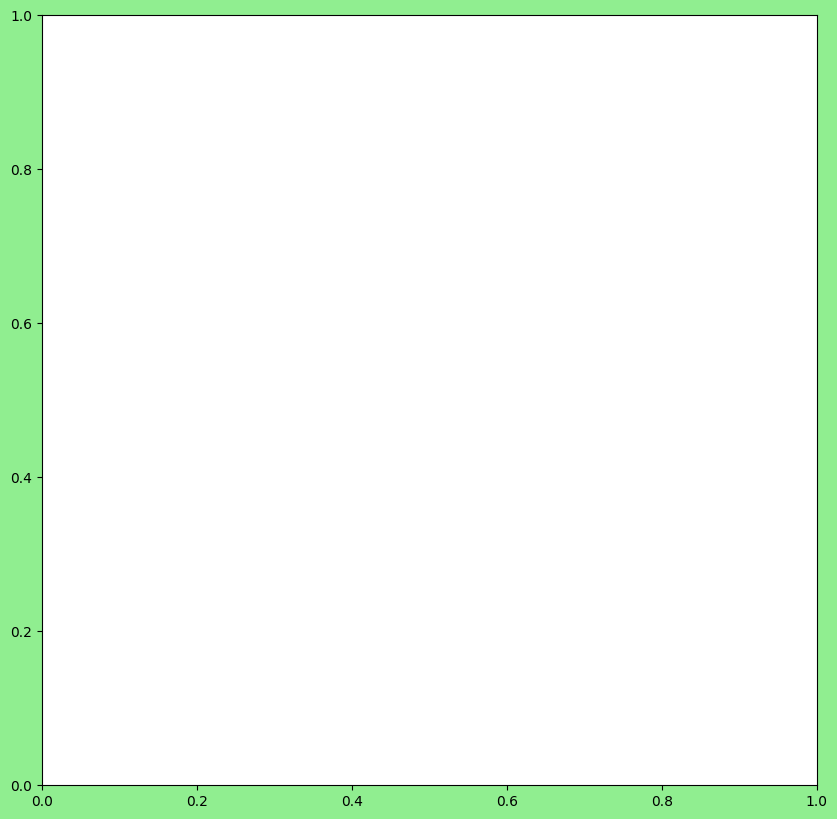

In [62]:
plt.figure(facecolor = 'lightGreen', figsize = (10, 10))
plt.scatter(y_test, pred, color = 'orange')
plt.xlabel("Ratings of IMDb Users")
plt.ylabel('Episodes of "Office"')
plt.title('IMDb User Ratings per Episode of "Office"')
plt.show()

plt.figure(facecolor = 'lightGreen', figsize = (10, 10))
plt.scatter(y_test2, pred2, color = 'orange')
plt.xlabel("Total Votes of IMDb Users")
plt.ylabel('Episodes of "Office"')
plt.title('IMDb Total Votes per Episode of "Office"')
plt.show()

Evaluate the Model using Regression Metrics:

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

MAE = mean_absolute_error(y_test, pred)
MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test, pred)

print(f"Mean Absolute Error (MAE): {MAE:.2f}")
print(f"Mean Squared Error (MSE): {MSE:.2f}")
print(f"Root Mean Squared Error (RMSE): {RMSE:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 0.38
Mean Squared Error (MSE): 0.25
Root Mean Squared Error (RMSE): 0.50
R-squared (R2): 0.18


To find the episode with the highest IMDb rating, we can sort the dataframe by 'IMDb User Rating' in descending order and select the first row.

In [63]:
highest_rated_episode = office_df.sort_values(by='IMDb User Rating', ascending=False).iloc[0]
print("Episode with the Highest IMDb Rating:")
display(highest_rated_episode)

Episode with the Highest IMDb Rating:


,55109
Index,55110
Season,9
Episode,24
Episode Title,Finale
Director,Ken Kwapis
Writer,Greg Daniels
Character,Creed
Dialogue,I saw a friend today. It had been a while. And...
Dialogue with Stage Direction,[playing guitar and singing] I saw a friend to...
IMDb User Rating,9.7


Similarly, to find the episode with the highest total votes, we can sort the dataframe by 'Total IMDb User Votes' in descending order and select the first row.

In [64]:
highest_voted_episode = office_df.sort_values(by='Total IMDb User Votes', ascending=False).iloc[0]
print("\nEpisode with the Highest Total IMDb User Votes:")
display(highest_voted_episode)


Episode with the Highest Total IMDb User Votes:


,55129
Index,55130
Season,9
Episode,24
Episode Title,Finale
Director,Ken Kwapis
Writer,Greg Daniels
Character,Pam
Dialogue,I thought it was weird when you picked us to m...
Dialogue with Stage Direction,I thought it was weird when you picked us to m...
IMDb User Rating,9.7
